# **Klasifikasi Model Dengan Logistic Regression Dan KNN pada Dataset Social Network Ads TASK 1**


Machine Learning Week 1 Task 1 - Azmi Taqiuddin Syah - 1103213078

## Import libraries Yang Dibutuhkan

Library yang di butuhkan Sebagai Berikut

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Mengimport dataset

Mengimport Dataset, Dataset terdapat di folder path Dataset\Social_Network_Ads.csv

In [2]:
df = pd.read_csv('Dataset\Social_Network_Ads.csv')
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


mengecek seluruh isi datasetnya dan tipe datanya kita menggunakan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


Mengecek apakah data sudah bersih, dalam kasus ini 0 adalah False dan 1 adalah True, tidak ada angka yang ambigu

In [4]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## Splitting datasetnya menjadi Training set dan Test set

##  X (Fitur/Input Data):

X adalah matriks atau array yang berisi fitur-fitur dari dataset, juga disebut input variables atau independent variables.
Setiap kolom dalam X merepresentasikan satu fitur atau variabel input.
Setiap baris dalam X merepresentasikan satu sampel data.
Contoh dalam dataset:

Jika kita memiliki dataset pelanggan dengan kolom Age dan EstimatedSalary, maka X adalah semua nilai dari kolom tersebut.

In [5]:
X = df[['Age', 'EstimatedSalary']]

## y (Label/Output Data):

y adalah vektor yang berisi output variables atau dependent variables, yaitu label atau target yang ingin kita prediksi.
Ini biasanya adalah satu kolom yang berisi nilai kelas atau target yang dikaitkan dengan setiap baris dari X.
Contoh dalam dataset:

Jika kita memprediksi apakah seseorang membeli produk (0 untuk tidak, 1 untuk ya), maka y adalah kolom Purchased yang berisi label 0 atau 1 untuk setiap pelanggan.

In [6]:
y = df['Purchased']

# **Logistic Regression Model**

### Training Logistic Regression model pada Training set


### Penjelasan Singkat:

1. **`X`**: Matriks fitur (input) yang berisi variabel independen (misalnya, **Age** dan **EstimatedSalary**).
2. **`y`**: Vektor target (output) yang berisi label yang ingin diprediksi (misalnya, kolom **Purchased**).
3. **`train_test_split()`**: Fungsi dari **scikit-learn** yang membagi data menjadi dua set: training (75%) dan test (25%).
4. **`test_size=0.25`**: Menentukan bahwa 25% dari data akan digunakan untuk test set.
5. **`random_state=0`**: Mengatur seed untuk pengacakan, sehingga pembagian data konsisten setiap kali kode dijalankan.

### Hasil:
- **`X_train`** dan **`y_train`**: Data yang digunakan untuk melatih model.
- **`X_test`** dan **`y_test`**: Data yang digunakan untuk menguji model.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Scaling

1. **`StandardScaler()`**: Inisialisasi objek untuk melakukan scaling, yang mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.

2. **`scaler.fit_transform(X_train)`**: 
   - **`fit`**: Menghitung rata-rata dan deviasi standar dari **X_train**.
   - **`transform`**: Menerapkan scaling ke **X_train** berdasarkan nilai yang telah dihitung.

3. **`scaler.transform(X_test)`**: Menerapkan scaling yang sama ke **X_test** menggunakan rata-rata dan deviasi standar dari **X_train**, tanpa menghitung ulang.

### Hasil:
- **`X_train`** dan **`X_test`** sekarang terstandarisasi, yang membantu model machine learning untuk berfungsi lebih baik dengan data yang terukur pada skala yang sama.

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Predicting a new result

1. **`LogisticRegression(random_state=0)`**:
   - **Inisialisasi Model**: Membuat objek model Logistic Regression.
   - **`random_state=0`**: Menetapkan seed untuk pengacakan, sehingga hasil pelatihan model konsisten setiap kali kode dijalankan.

2. **`model.fit(X_train, y_train)`**:
   - **Pelatihan Model**: Model dilatih menggunakan data fitur **X_train** dan label target **y_train**.
   - Selama proses ini, model belajar dari data untuk mengidentifikasi pola yang memisahkan kelas (misalnya, membeli atau tidak membeli).

### Hasil:
- Setelah pernyataan ini dieksekusi, model telah dilatih dan siap untuk digunakan dalam membuat prediksi berdasarkan data baru.

In [9]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

1. **`model.predict(X_test)`**:
   - **Prediksi**: Menggunakan model Logistic Regression yang telah dilatih untuk memprediksi kelas (output) dari data fitur dalam **X_test**.
   - Model akan memberikan output berupa nilai 0 atau 1, tergantung pada prediksi apakah pelanggan membeli produk atau tidak.

2. **`y_pred`**:
   - Variabel ini menyimpan hasil prediksi yang dihasilkan oleh model untuk semua sampel dalam **X_test**.

### Hasil:
- **`y_pred`** berisi array dengan prediksi kelas untuk setiap entri di **X_test**, yang dapat digunakan untuk mengevaluasi performa model, seperti menghitung akurasi atau membuat Confusion Matrix.

In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Making the Confusion Matrix


1. **`confusion_matrix(y_test, y_pred)`**:
   - Menghitung **matriks kebingungan**, yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
   - Matriks ini terdiri dari empat komponen: True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN), yang membantu memahami kinerja model.

2. **`accuracy_score(y_test, y_pred)`**:
   - Menghitung **akurasi** model, yaitu proporsi prediksi yang benar dari total prediksi.
   - Akurasi dihitung dengan rumus: \((TP + TN) / (TP + TN + FP + FN)\).

3. **`plt.figure(figsize=(10,7))`**:
   - Mengatur ukuran figure untuk visualisasi.

4. **`sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', cbar=False)`**:
   - Menggunakan **Seaborn** untuk membuat **heatmap** dari matriks kebingungan.
   - **`cmap="Blues"`**: Mengatur warna peta untuk heatmap.
   - **`annot=True`**: Menampilkan nilai dalam setiap sel matriks.
   - **`fmt='d'`**: Mengatur format nilai yang ditampilkan sebagai integer.
   - **`cbar=False`**: Menyembunyikan color bar di samping heatmap.

5. **`print("Accuracy:", accuracy)`**:
   - Menampilkan nilai akurasi model di konsol.

### Hasil:
- **Matriks Kebingungan**: Visualisasi yang menunjukkan performa prediksi untuk setiap kelas.
- **Akurasi**: Nilai antara 0 dan 1 yang menunjukkan seberapa baik model melakukan prediksi. Nilai 1 berarti semua prediksi benar, sedangkan nilai 0 berarti semua prediksi salah.

Accuracy: 0.89


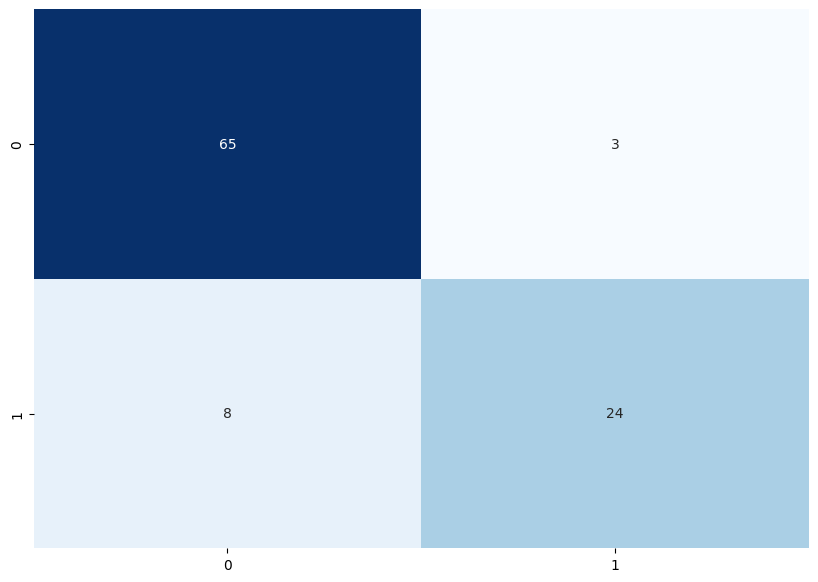

In [11]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', cbar=False)
print("Accuracy:", accuracy)

Fungsi ini akan menghasilkan plot yang menunjukkan bagaimana model memisahkan kelas berdasarkan dua fitur (dalam hal ini, Age dan Estimated Salary), serta titik-titik data asli. Ini berguna untuk memahami performa model dan bagaimana ia membuat prediksi.

In [12]:
def plot_decision_boundary(X, y, model, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.2, cmap=ListedColormap(('darkblue', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('darkblue', 'blue'))(i), label=j)
        plt.legend()
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')


## Visualising the Training set results

C:\Users\ccoos\AppData\Local\Temp\ipykernel_26572\1780471208.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


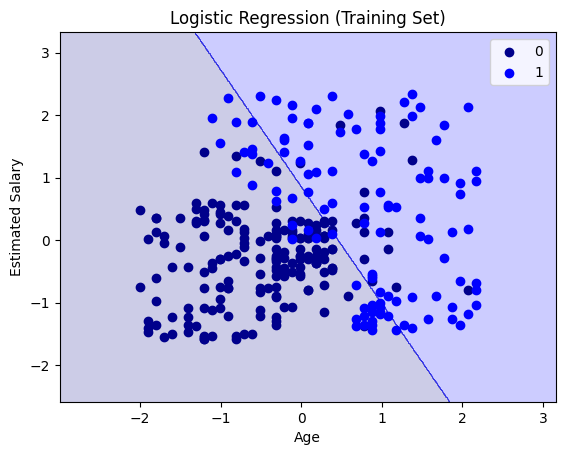

In [13]:
plot_decision_boundary(X_train, y_train, model, title="Logistic Regression (Training Set)")

## Visualising the Test set results

C:\Users\ccoos\AppData\Local\Temp\ipykernel_26572\1780471208.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


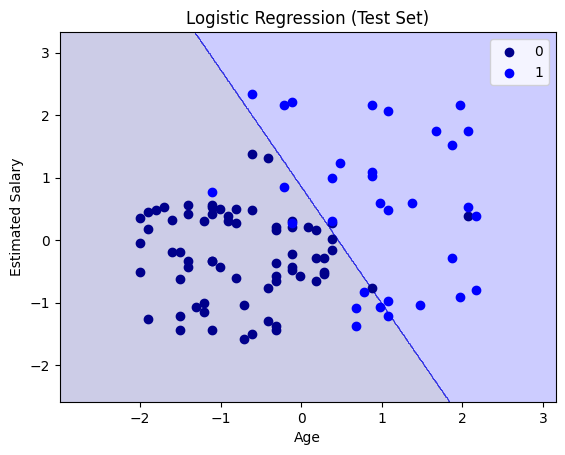

In [14]:
plot_decision_boundary(X_test, y_test, model, title="Logistic Regression (Test Set)")